Abby Experiments

In [1]:
import os

def move_to_parent_dir():
    current_directory = os.getcwd()
    parent_directory = os.path.dirname(current_directory)
    os.chdir(parent_directory)
    print("Working directory:", os.getcwd())

move_to_parent_dir() 

Working directory: c:\Users\abiga\Documents\GitHub\dsmp-2024-group-19


In [8]:
# get test data
import matplotlib.pyplot as plt
import numpy as np
from tools import get_Tapes
raw_tapes = get_Tapes(125,0)
tapes_data = [t["Price"].resample("1min").last().ffill().to_numpy() for t in raw_tapes] # resample down to 1 min

# define broker
def broker(actor, price_data: np.array, starting_cash: int):
    time_index = 0
    final_time_index = price_data.shape[0]
    num_stocks = np.zeros_like(price_data)
    cash_value = np.zeros_like(price_data)
    cash_value[0] = starting_cash

    while True:
        action = actor(price_data[:time_index], cash_value[time_index], num_stocks[time_index])

        if action == 1: # buy one stock
            if cash_value[time_index] >= price_data[time_index]:
                cash_value[time_index] = cash_value[time_index] - price_data[time_index]
                num_stocks[time_index] = num_stocks[time_index] + 1

        elif action == 2: # sell one stock
            if num_stocks[time_index] > 0:
                num_stocks[time_index] = num_stocks[time_index] - 1
                cash_value[time_index] = cash_value[time_index] + price_data[time_index]
        else: # do nothing
            pass


        time_index += 1
        if time_index >= final_time_index:
            break

        num_stocks[time_index] = num_stocks[time_index - 1]
        cash_value[time_index] = cash_value[time_index - 1]

    total_value = num_stocks * price_data + cash_value
    profit = (total_value[-1] / starting_cash) - 1
    

    return num_stocks, cash_value, total_value, profit

# generate folds
def generate_folds(tapes_data, n_folds=5):
    tapes_data = np.array(tapes_data)
    fold_size = len(tapes_data) // n_folds
    
    for i in range(n_folds):
        start_index = i * fold_size
        end_index = (i + 1) * fold_size if i < n_folds - 1 else len(tapes_data)
        
        test_indices = np.arange(start_index,end_index,1, dtype=int)
        # Test split
        test_data = tapes_data[test_indices]
        
        # Training split
        train_data = np.delete(tapes_data, test_indices, axis=0)
        
        yield train_data, test_data

def display_results(results, data):
    plt.figure(figsize=(20,5))
    plt.plot(results[2], 'r', label = "actor")
    plt.twinx()
    plt.plot(data, 'b', label = "data")
    plt.legend()
    plt.show()

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

In [3]:
def random_actor(current_data, current_cash, current_stocks):
    return np.random.randint(0,3)

def MA_actor(current_data, current_cash, current_stocks):
    if len(current_data) == 0:
        return 0

    window = 20
    ma = np.mean(current_data[-window:])

    if ma > current_data[-1]:
        return 1
    else:
        return 2

results = broker(MA_actor, tapes_data[0], 10_000)

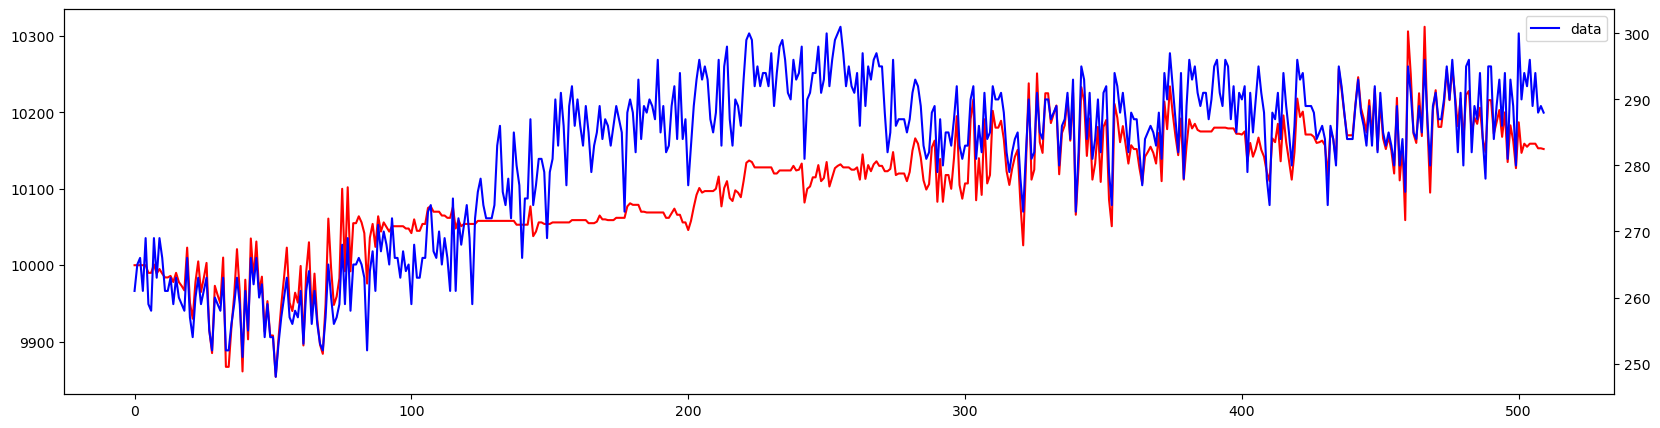

In [4]:
display_results(results, tapes_data[0])

In [5]:
cv_scores = []
for train_data, test_data in generate_folds(tapes_data):
    # train model
    
    for data in test_data:
        results = broker(random_actor, data, 10_000)
        cv_scores.append(results[-1])

print(cv_scores)

[-0.0022999999999999687, 0.012199999999999989, -0.03079999999999994, -0.03299999999999992, 0.011299999999999977, -0.0012000000000000899, 0.03849999999999998, -0.0524, -0.021600000000000064, 0.07379999999999998, 0.025800000000000045, -0.06259999999999999, -0.10460000000000003, 0.054400000000000004, 0.021700000000000053, 0.0043999999999999595, 0.0012999999999999678, -0.1543000000000001, 0.008499999999999952, 0.02749999999999997, -0.0023999999999999577, -0.010699999999999932, -0.05499999999999994, -0.00649999999999995, 0.007199999999999984, -0.02190000000000003, 0.028100000000000014, -0.008999999999999897, -0.01079999999999992, 0.027800000000000047, 0.006299999999999972, -0.022599999999999953, -0.01629999999999998, -0.013900000000000023, 0.0504, -0.021700000000000053, 0.016000000000000014, -0.03210000000000002, 0.009199999999999986, 0.02639999999999998, 0.06579999999999997, -0.013700000000000045, -0.008599999999999941, 0.0027000000000000357, 0.022499999999999964, -0.005700000000000038, -0

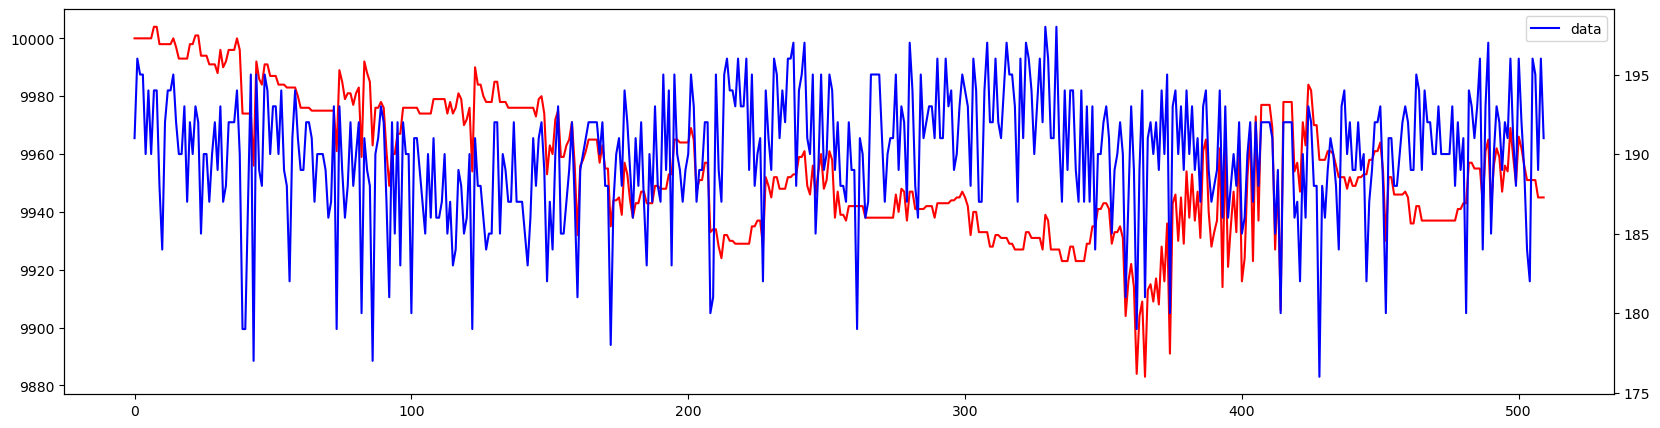

Profit £-79


In [55]:
def MA_actor_inverted(current_data, current_cash, current_stocks):
    if len(current_data) == 0:
        return 0  

    window = 20
    ma = np.mean(current_data[-window:]) 

    if current_data[-1] > ma:
        return 1  
    else:
        return 2  
    
display_results(results, tapes_data[50])

results = broker(MA_actor_inverted, tapes_data[50], 10_000)

final_total_value = results[2][-1]
profit = final_total_value - 10000

#print(f"Final Total Value: £{final_total_value}")
print(f"Profit £{profit}")


Exponential Moving Average (EMA) Crossover

-Uses two EMAs, short and long-term, to generate buy and sell signals based on the crossing over of these averages

-When the short-term EMA crosses above the long-term EMA, it's considered a buy signal

-When the short-term EMA crosses below the long-term EMA, it's considered a sell signal

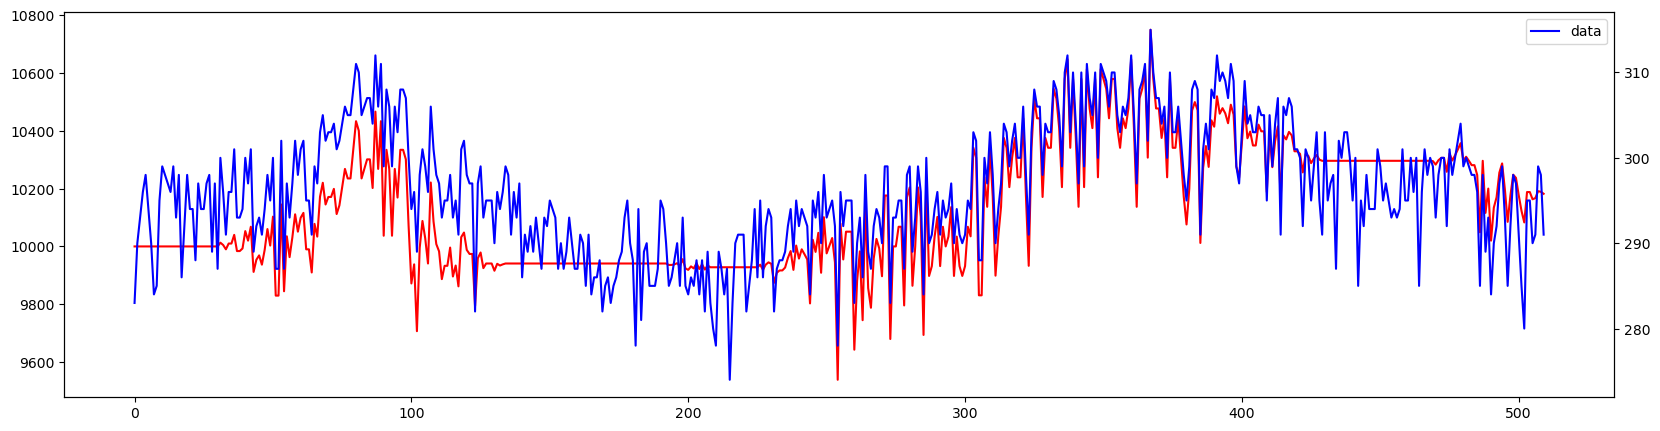

In [56]:
def EMA_actor(current_data, current_cash, current_stocks):
    if len(current_data) < 30:  
        return 0  

    short_window = 10 
    long_window = 45

    short_ema = np.mean(current_data[-short_window:])
    
    long_ema = np.mean(current_data[-long_window:])
    
    if short_ema > long_ema:  
        return 1 
    elif short_ema < long_ema:  
        return 2  
    else:
        return 0 


results = broker(EMA_actor, tapes_data[1], 10_000)

display_results(results, tapes_data[1])


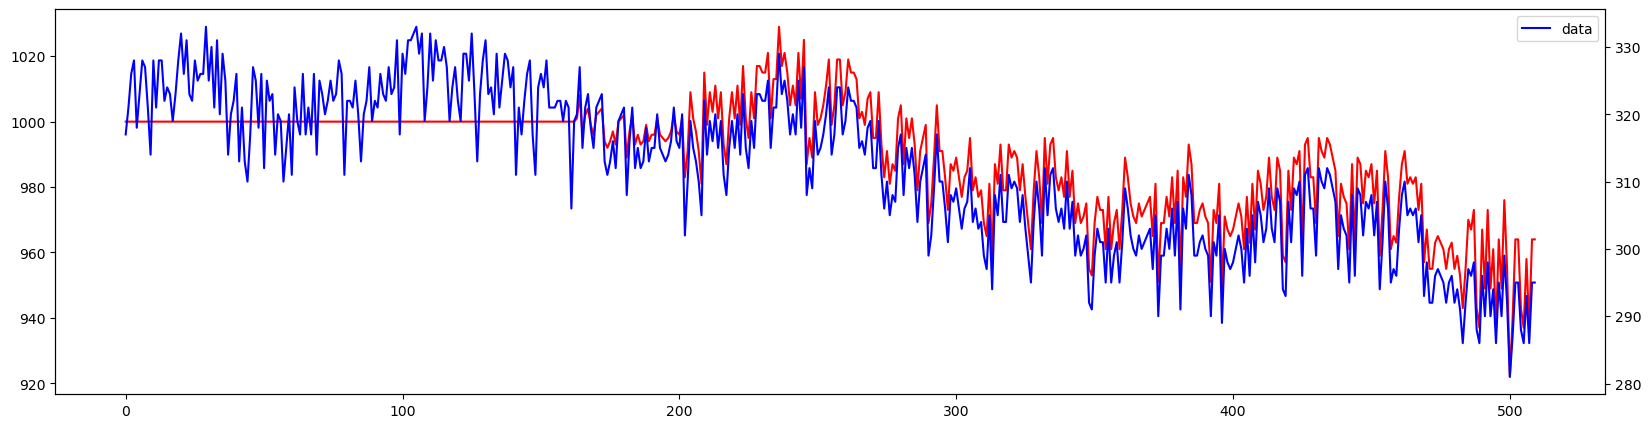

Profit = £-36


In [88]:
def RSI_actor(current_data, current_cash, current_stocks):
    if len(current_data) < 14:  
        return 0 

    deltas = np.diff(current_data)
    seed = deltas[:13]
    up = seed[seed >= 0].sum()/14
    down = -seed[seed < 0].sum()/14

    rs = up/down
    rsi = np.zeros_like(current_data)
    rsi[:14] = 100. - 100./(1. + rs)

    for i in range(14, len(current_data)):
        delta = deltas[i - 1]  

        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up * 13 + upval) / 14
        down = (down * 13 + downval) / 14

        rs = up / down
        rsi[i] = 100. - 100. / (1. + rs)

#Buys if over 40, sells if under 90. Won't do anything if the window is reduced lower than this.
    if rsi[-1] < 40:
        return 1  # Buy
    elif rsi[-1] > 90:
        return 2  # Sell
    else:
        return 0  # Hold


results = broker(RSI_actor, tapes_data[14], 1_000)
display_results(results, tapes_data[14])

# Assuming 'results' is the output of the broker function
_, _, total_value, _ = results
last_total_value = total_value[-1]  # Get the last value of the total_value array
#print(f"The final value is: {last_total_value}")

profit = last_total_value - 1_000

print(f"Profit = £{profit}")


RSI is bad. If window too small, doesn't buy or sell at all. (If lower bound below 20, and upper below 80). If window is big enough for it to buy or sell, typically holds until price is going down then buys, so when price is going down model goes down quickly. Only way this model makes money is if the close price is significantly higher than the open price, and often it does not increase as much as the market value, so buying at the start of the day and selling at the end would make more money. 

examples: 
index 90, somehow doesnt lose money
index 14, loses money in line with stock price
index 80, makes money in line with stock price